In [260]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import butter, lfilter , filtfilt
import pandas as pd
import scipy as sp
import os
import sys
import seaborn as sb 
from matplotlib import cm
import ruptures as rpt
import pickle

Define the subject

In [261]:
subject = 'MR012'

Define the workspace

In [262]:
data_folder = "/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data"

## Retrieve the data from pickle 

Run through the class structure in order to be able to retrieve pickle file

In [263]:

class DfSubject:
    def __init__(self, elec_i, muscle_i):
        self.Elec_config=list_elecs[elec_i]
        self.Muscle_or_other=list_muscle_or_other_elec_i[muscle_i]
        self.Trial_number= df_subject_no_empty[(df_subject_no_empty["Elec_config"]==self.Elec_config)& (df_subject_no_empty["Muscle_or_other"]== self.Muscle_or_other)]["Trial_number"]
        self.Raw= df_subject_no_empty[(df_subject_no_empty["Elec_config"]==self.Elec_config)& (df_subject_no_empty["Muscle_or_other"]== self.Muscle_or_other)]["Raw"]
        self.Raw.index=self.Trial_number
        self.Time_points= df_subject_no_empty[(df_subject_no_empty["Elec_config"]==self.Elec_config)& (df_subject_no_empty["Muscle_or_other"]== self.Muscle_or_other)]["Time_points"]
        self.Amplitudes= df_subject_no_empty[(df_subject_no_empty["Elec_config"]==self.Elec_config)& (df_subject_no_empty["Muscle_or_other"]== self.Muscle_or_other)]["Amplitudes"]
        self.TS_arts_1="$"
        # self.TS_arts_1.index=self.Trial_number
        self.Time_points_arts_1=-1
        self.TS_arts_2="$"
        self.Time_points_arts_2=-1


# Goal is to chose an electrode and a muscle and see all the trials and the corrected data        
#  Access data the following way: pData["_3_5"].Raw[19] #prints the raw data from trial 19

Always retrieve pData["_0_0"] since some list_elec and list_muscle is accesced from there

In [264]:
### retrieve  dfSubject structured as pData  #
#run the structure of the data before opening the pickle (wihtout creating an object)
# command pData["_0_"].Trial_number=0
import pickle
run=1
if run == 1:  

    with open('Class2_Dump.pkl', 'rb') as handle:
        pData = pickle.load(handle)


# Load the data

In [265]:
# Saving the data_frame
def save_data_frame(data_folder,file_name,df_to_save,verbose=0):
    """ Vaces the input dataframe as a csv in the given folder."""
    file_name_for_saving_the_raw_df = file_name
    raw_data_file_path = os.path.join(data_folder,file_name_for_saving_the_raw_df)
    df_to_save.to_csv(raw_data_file_path)
    #path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)

### Plotting the raw data

In [266]:


def plot_trial_elec_i_muscle_i(df_subject_no_empty_elec_i_muscle_i,elec_i, muscle_i_elec_i, time_series_key='Raw',time_points_key='Time_points',init_t_plot = 0,end_t_plot = -1, save_flag=0,save_folder='tmp'):
    """Simplest plotting function for a time serie stored in the dataframe"""
    print(f"We are printing {time_series_key}")
    n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
    plt.figure(figsize = (10,5))
    offset = 0
    ax = plt.axes()
    for i_trials_elec_i_muscle_i in range(n_trials_elec_i_muscle_i):
        offset += 1.0
        trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trials_elec_i_muscle_i]
        time_points_trial_i=int(trial_i_elec_i_muscle_i[time_points_key])
        time_array = dt*np.arange(1,time_points_trial_i+1)
        values=[]
        if time_series_key=='Raw':
            values = trial_i_elec_i_muscle_i[time_series_key]
        else:
            values = trial_i_elec_i_muscle_i[time_series_key]#[0]
        plt.plot(time_array[init_t_plot:end_t_plot],values[init_t_plot:end_t_plot]+ offset, linewidth = 1.5, color = (i_trials_elec_i_muscle_i/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
    plt.xlabel('Time [s]', fontsize=10),
    plt.ylabel('Trial number', fontsize=10),
    plt.title(elec_i+"-"+muscle_i_elec_i, fontsize=20)
    if save_flag:
        data_file = time_series_key+"_"+elec_i+muscle_i_elec_i+'.png'
        data_file_path = os.path.join(save_folder,data_file)
        plt.savefig(data_file_path, transparent = "True", bbox_inches='tight')

In [267]:
time_series_key='Raw'
time_points_key='Time_points'
init_t_plot = 100
end_t_plot = 300

In [268]:


def plot_trial_elec_i_muscle_i_arifact_free(df_subject_no_empty_elec_i_muscle_i,elec_i, muscle_i_elec_i, time_series_key='TS_arts_1',time_points_key='Time_points_arts_1',init_t_plot = 0,end_t_plot = -1, save_flag=0,save_folder='tmp'):
    """Simplest plotting function for a time serie stored in the dataframe"""
    time_series_key='TS_arts_1'
    time_points_key='Time_points_arts_1'
    print(f"We are printing {time_series_key}")
    n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
    print(f" n_trials_elec_i_muscle_i: {n_trials_elec_i_muscle_i}")
    plt.figure(figsize = (10,5))
    offset = 0
    ax = plt.axes()
    for i_trials_elec_i_muscle_i in range(n_trials_elec_i_muscle_i):
        offset += 1.0
        trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trials_elec_i_muscle_i]
        time_points_trial_i=int(trial_i_elec_i_muscle_i[time_points_key])
        time_array = dt*np.arange(1,time_points_trial_i+1)
        values=[]
        if time_series_key=='TS_arts_1':
            values = trial_i_elec_i_muscle_i[time_series_key]
        else:
            values = trial_i_elec_i_muscle_i[time_series_key]#[0]
        plt.plot(time_array[init_t_plot:end_t_plot],values[init_t_plot:end_t_plot]+ offset, linewidth = 1.5, color = (i_trials_elec_i_muscle_i/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
    plt.xlabel('Time [s]', fontsize=10),
    plt.ylabel('Trial number', fontsize=10),
    plt.title(str(elec_i)+"-"+str(muscle_i_elec_i)+"artifact_freer_data", fontsize=20)
    if save_flag:
        data_file = time_series_key+"_"+elec_i+muscle_i_elec_i+'.png'
        data_file_path = os.path.join(save_folder,data_file)
        plt.savefig(data_file_path, transparent = "True", bbox_inches='tight')

## Filtering the signal

Following [Rowald, Komi, Demesmeaker et al. 2022](https://www.nature.com/articles/s41591-021-01663-5#Sec14):
```
Analysis of lower limb muscle activity

The electromyographic activity from lower limb muscles was processed according to SENIAM (Surface Electromyography for the Non-Invasive Assessment of Muscles) standards for electromyographic recordings. All displayed electromyographic activities during walking were band-pass filtered between 10 and 450 Hz (fourth-order Butterworth filter). A moving average of the rectified electromyographic signal within a centered 250-ms time window was used to generate normalized electromyographic envelopes for quantification.
```
Even it is walking we can consider applying the same:
1. Band-pass 10-450 Hz (fourth-order Butterworth filter).
2. Rectify (absolute value).
3. Average 250 ms time window average filter.

In [269]:
high_band = 450
low_band = 10
order_filter = 4
average_window_filter_seconds=0.005

In [270]:
# Filtering preparation
butter_sos_filter = sp.signal.butter(N=order_filter,Wn=[low_band,high_band],btype='bandpass',output='sos',fs=fs)
average_window_filter_size=int(np.ceil(average_window_filter_seconds/dt))

In [271]:
th_corr = 0.6
n_t_points_before = 0
min_size_transients = 100
beta_value_transients = 1
indices_to_go_back_and_zero = 50
transient_index=-2
end_index_zero_transients=-1

Our experiments showed that there are a number of artefacts. And that the average 250 ms time window average filter was smoothing the signal to the point of suppressing it. 
We changed our pipeline to:

1. Find the artefacts that keep repeating all over the signal.
2. Do pattern matching on the signals using a simple cross-validation threshold to find the location of these artefacts on signals.
3. Replace by 0s wherever these artefacts are found.
4. Find high transients and replace these chunks between these high transients with 0s using the `ruptures` library, implemented in [Selective review of offline change point detection methods](https://doi.org/10.1016/j.sigpro.2019.107299).

Then we proceed with:

5. Band-pass 10-450 Hz (fourth-order Butterworth filter).
6. Rectify (absolute value).
7. Average 5 ms time window average filter.

After a couple of tests, 250ms is way too much. 5 ms seems to be reasonable

# Find Artifacts

### First Artifact

For a new artifact definition copy the code for the first artifact and replace:

1. the first five parameters (i_elec_artifact,..)
2. artifact_time_serie_3 to new nr
3. throughout data replace pData[""] with resp. number and also trial nr has to be adapted sth!
4. TS_arts_1 and Time_points_arts_3 to resp number

In [272]:

# We get the last point in time
last_t_point = pData["_3_5"].Time_points.max()
# We take some before to define our end of array
n_points_before_last_t_pont = 4
init_t_plot = 0
end_t_plot = last_t_point-n_points_before_last_t_pont


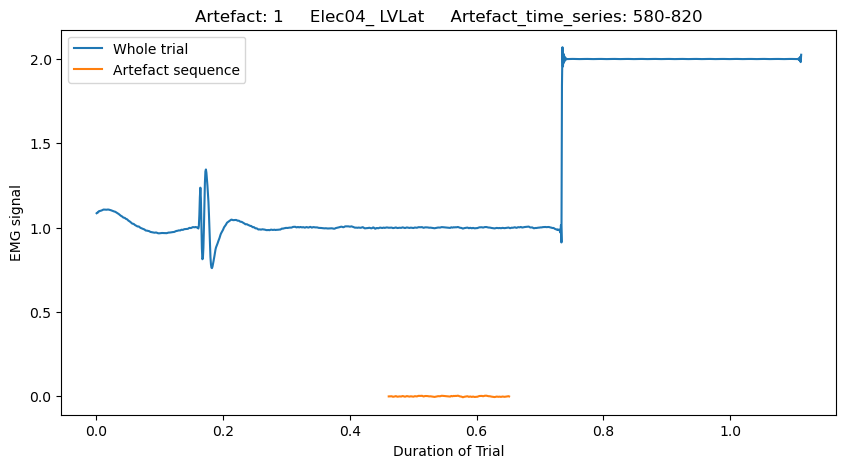

In [273]:
#Plot artifact one

i_elec_artifact=3
i_muscle_i_elec_artifact=5
i_trial_i_muscle_i_elec_artifact=19
init_t_artifact=580
end_t_artifact=820
artifact_number=1

fs = 1259.3
dt = 1/fs

# We get the last point in time
last_t_point = int(pData["_3_5"].Time_points.max())
# We take some before to define our end of array
n_points_before_last_t_pont = 4
init_t_plot = 0
end_t_plot = last_t_point-n_points_before_last_t_pont
time_points_trial_i= len(pData["_3_5"].Raw[19])   #int(trial_i_elec_i_muscle_i['Time_points']) #number of time points
time_array = dt*np.arange(1,time_points_trial_i+1) #dt = 1/fs sampling interval( abhängig vom EMG)
trial_i_muscle_i_elec_i_raw = pData["_3_5"].Raw[19]#trial_i_elec_i_muscle_i[time_series_key]
plt.figure(figsize = (10,5))
offset = 1.0
plt.xlabel("Duration of Trial")
plt.ylabel("EMG signal")
plt.title(f"Artefact: {artifact_number}     {pData['_3_5'].Elec_config} {pData['_3_5'].Muscle_or_other}     Artefact_time_series: {init_t_artifact}-{end_t_artifact}")
plt.plot(time_array[init_t_plot:end_t_plot],pData["_3_5"].Raw[19][init_t_plot:end_t_plot]+ offset, linewidth = 1.5, label= "Whole trial") 
plt.plot(time_array[init_t_artifact:end_t_artifact],pData["_3_5"].Raw[19][init_t_artifact:end_t_artifact], linewidth = 1.5, label="Artefact sequence") 
plt.legend()
artifact_time_serie_1 = pData["_3_5"].Raw[19][init_t_artifact:end_t_artifact]

In [274]:

print(f"artifact_number:{artifact_number}" )
subject_plots_folder_name=subject+'_plots'
save_folder = os.path.join(data_folder,subject_plots_folder_name)
save_file = subject+"artf"+str(artifact_number)+"_"+str(i_elec_artifact)+"_"+str(i_muscle_i_elec_artifact)+"_"+str(i_trial_i_muscle_i_elec_artifact)+"_"+str(init_t_artifact)+"-"+str(end_t_artifact)+".csv"
save_file_path = os.path.join(save_folder,save_file)
np.savetxt(save_file_path, artifact_time_serie_1, delimiter=',')

artifact_number:1


In [275]:
# Find the max cross_corr overall for normalization
max_corr_val = -999999999 
for elec_i in range (len(pData["_0_0"].List_elecs)) : #loop through all the elecs
    for muscle_i in range (len(pData["_0_0"].List_muscle_or_other)): # loop through all the muscles
            for trial in pData[f'_{elec_i}_{muscle_i}'].Trial_number: #loop through the trials
                corr = sp.signal.correlate(pData[f'_{elec_i}_{muscle_i}'].Raw[trial], artifact_time_serie_1)
                corr_abs = np.abs(corr)
                if np.max(corr_abs) > max_corr_val:  
                    max_corr_val = np.max(corr_abs) 


n_t_points_after = len(artifact_time_serie_1)

Check if correlation took place, thus check TS_arts_1 before and after correlation

In [276]:
pData["_0_0"].TS_arts_1

'$'

Free data from artifact 1 and save it in TS_arts_1

In [277]:


for elec_i in range (len(pData["_0_0"].List_elecs)): #loop through all the elecs
    for muscle_i in range (len(pData["_0_0"].List_muscle_or_other)): # loop through all the muscles
            for trial in pData[f'_{elec_i}_{muscle_i}'].Trial_number: #loop through the trials
                trial_i_muscle_i_elec_i_raw = pData[f'_{elec_i}_{muscle_i}'].Raw[trial]                   #trial_i_elec_i_muscle_i["Raw"]
                trial_i_muscle_i_elec_i_raw_to_zero = trial_i_muscle_i_elec_i_raw.copy()
                corr = sp.signal.correlate(trial_i_muscle_i_elec_i_raw, artifact_time_serie_1)
                lags = sp.signal.correlation_lags(len(trial_i_muscle_i_elec_i_raw), len(artifact_time_serie_1))
                corr_abs = np.abs(corr)
                corr_abs /= max_corr_val
                indices_to_delete = np.where(corr_abs>th_corr)[0] - (len(artifact_time_serie_1)) #What is the goal of that??
                for i_index_to_delete in range(len(indices_to_delete)):
                    index_to_delete_i = indices_to_delete[i_index_to_delete]
                    trial_i_muscle_i_elec_i_raw_to_zero[index_to_delete_i-n_t_points_before:index_to_delete_i+n_t_points_after] = 0
        
                # Saving in the dataframe
                pData[f'_{elec_i}_{muscle_i}'].TS_arts_1  = trial_i_muscle_i_elec_i_raw_to_zero
                pData[f'_{elec_i}_{muscle_i}'].Time_points_arts_1 = len(trial_i_muscle_i_elec_i_raw_to_zero)
           

In [278]:
pData["_0_0"].TS_arts_1

array([2.45185010e-03, 1.76560161e-03, 5.74205597e-04, ...,
       9.65748195e-01, 1.05082721e+00, 9.00982465e-01])

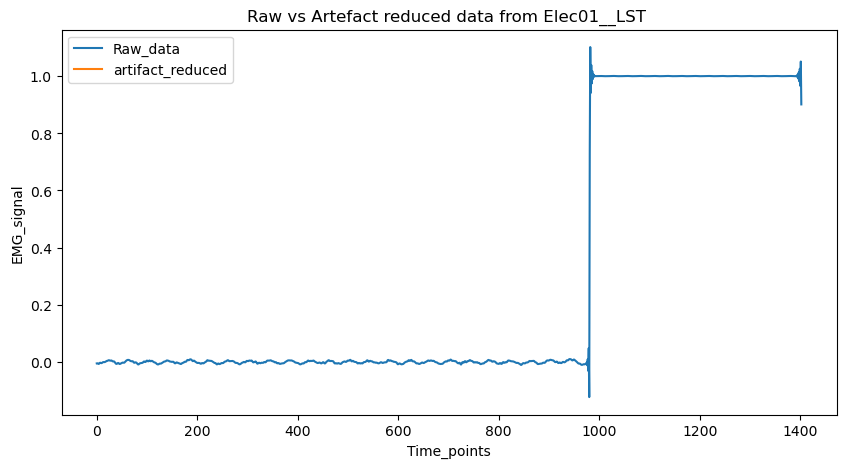

In [279]:
plt.figure(figsize = (10,5))
plt.xlabel("Time_points")
plt.ylabel("EMG_signal")
plt.title(f"Raw vs Artefact reduced data from {pData['_0_0'].Elec_config}_{pData['_0_0'].Muscle_or_other} ")
plt.plot(pData["_0_0"].Raw[27], linewidth = 1.5, label="Raw_data") 
plt.plot(pData["_0_0"].TS_arts_1[27], linewidth = 1.5, label="artifact_reduced") 
plt.legend()

### Second artifact

In [280]:

# We get the last point in time
last_t_point = pData["_1_3"].Time_points.max()
# We take some before to define our end of array
n_points_before_last_t_pont = 4
init_t_plot = 0
end_t_plot = last_t_point-n_points_before_last_t_pont

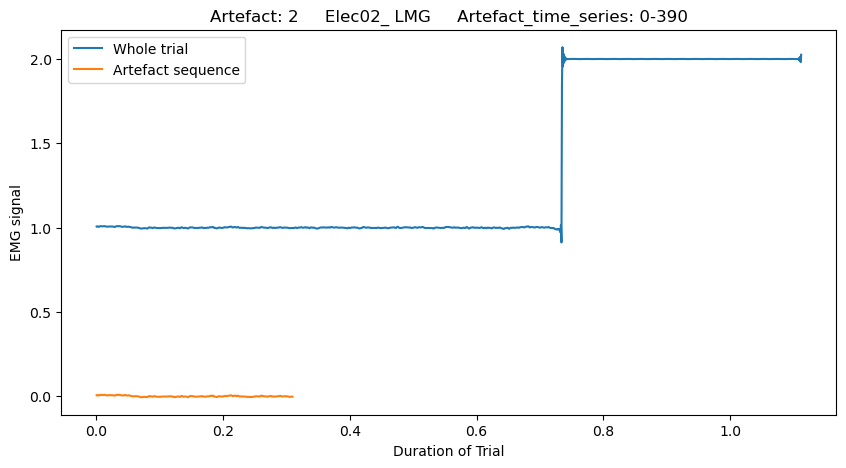

In [281]:
# #Plot artifact two

i_elec_artifact=1
i_muscle_i_elec_artifact=3
i_trial_i_muscle_i_elec_artifact=63
init_t_artifact=0
end_t_artifact=390
artifact_number=2

fs = 1259.3
dt = 1/fs

# We get the last point in time
last_t_point = int(pData["_1_3"].Time_points.max())
# We take some before to define our end of array
n_points_before_last_t_pont = 4
init_t_plot = 0
end_t_plot = last_t_point-n_points_before_last_t_pont
time_points_trial_i= len(pData["_1_3"].Raw[63])   #int(trial_i_elec_i_muscle_i['Time_points']) #number of time points
time_array = dt*np.arange(1,time_points_trial_i+1) #dt = 1/fs sampling interval( abhängig vom EMG)
trial_i_muscle_i_elec_i_raw = pData["_1_3"].Raw[63]#trial_i_elec_i_muscle_i[time_series_key]
plt.figure(figsize = (10,5))
offset = 1.0
plt.xlabel("Duration of Trial")
plt.ylabel("EMG signal")
plt.title(f"Artefact: {artifact_number}     {pData['_1_3'].Elec_config} {pData['_1_3'].Muscle_or_other}     Artefact_time_series: {init_t_artifact}-{end_t_artifact}")
plt.plot(time_array[init_t_plot:end_t_plot],pData["_1_3"].Raw[63][init_t_plot:end_t_plot]+ offset, linewidth = 1.5, label= "Whole trial") 
plt.plot(time_array[init_t_artifact:end_t_artifact],pData["_1_3"].Raw[63][init_t_artifact:end_t_artifact], linewidth = 1.5, label="Artefact sequence") 
plt.legend()
artifact_time_serie_2 = pData["_1_3"].Raw[63][init_t_artifact:end_t_artifact]



In [282]:
#save artifact
print(f"artifact_number:{artifact_number}" )
subject_plots_folder_name=subject+'_plots'
save_folder = os.path.join(data_folder,subject_plots_folder_name)
save_file = subject+"artf"+str(artifact_number)+"_"+str(i_elec_artifact)+"_"+str(i_muscle_i_elec_artifact)+"_"+str(i_trial_i_muscle_i_elec_artifact)+"_"+str(init_t_artifact)+"-"+str(end_t_artifact)+".csv"
save_file_path = os.path.join(save_folder,save_file)
np.savetxt(save_file_path, artifact_time_serie_2, delimiter=',')

artifact_number:2


In [283]:
# Find the max cross_corr overall for normalization
max_corr_val = -999999999 
for elec_i in range (len(pData["_0_0"].List_elecs)) : #loop through all the elecs
    for muscle_i in range (len(pData["_0_0"].List_muscle_or_other)): # loop through all the muscles
            for trial in pData[f'_{elec_i}_{muscle_i}'].Trial_number: #loop through the trials
                corr = sp.signal.correlate(pData[f'_{elec_i}_{muscle_i}'].Raw[trial], artifact_time_serie_2)
                corr_abs = np.abs(corr)
                if np.max(corr_abs) > max_corr_val:  
                    max_corr_val = np.max(corr_abs) 


n_t_points_after = len(artifact_time_serie_2)

Check if correlation took place, thus check TS_arts_2 before and after correlation

In [284]:
pData["_0_0"].TS_arts_2

'$'

Free data from artifact 2 and save it in TS_arts_2

In [285]:
for elec_i in range (len(pData["_0_0"].List_elecs)): #loop through all the elecs
    for muscle_i in range (len(pData["_0_0"].List_muscle_or_other)): # loop through all the muscles
            for trial in pData[f'_{elec_i}_{muscle_i}'].Trial_number: #loop through the trials
                trial_i_muscle_i_elec_i_raw = pData[f'_{elec_i}_{muscle_i}'].Raw[trial]                   #trial_i_elec_i_muscle_i["Raw"]
                trial_i_muscle_i_elec_i_raw_to_zero = trial_i_muscle_i_elec_i_raw.copy()
                corr = sp.signal.correlate(trial_i_muscle_i_elec_i_raw, artifact_time_serie_2)
                lags = sp.signal.correlation_lags(len(trial_i_muscle_i_elec_i_raw), len(artifact_time_serie_2))
                corr_abs = np.abs(corr)
                corr_abs /= max_corr_val
                indices_to_delete = np.where(corr_abs>th_corr)[0] - (len(artifact_time_serie_2)) #What is the goal of that??
                for i_index_to_delete in range(len(indices_to_delete)):
                    index_to_delete_i = indices_to_delete[i_index_to_delete]
                    trial_i_muscle_i_elec_i_raw_to_zero[index_to_delete_i-n_t_points_before:index_to_delete_i+n_t_points_after] = 0
        
                # Saving in the dataframe
                pData[f'_{elec_i}_{muscle_i}'].TS_arts_2  = trial_i_muscle_i_elec_i_raw_to_zero
                pData[f'_{elec_i}_{muscle_i}'].Time_points_arts_2 = len(trial_i_muscle_i_elec_i_raw_to_zero)
           

In [286]:
pData["_0_0"].TS_arts_2

array([2.45185010e-03, 1.76560161e-03, 5.74205597e-04, ...,
       9.65748195e-01, 1.05082721e+00, 9.00982465e-01])

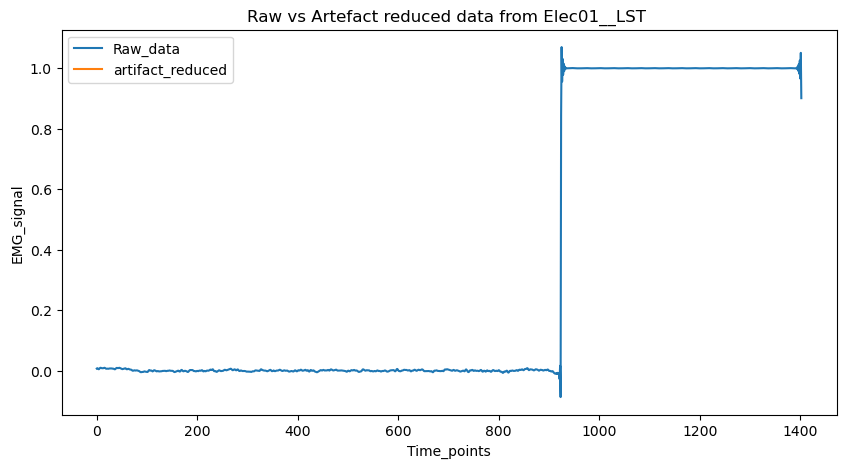

In [287]:
#plot the raw and the corrected veriosn
plt.figure(figsize = (10,5))
plt.xlabel("Time_points")
plt.ylabel("EMG_signal")
plt.title(f"Raw vs Artefact reduced data from {pData['_0_0'].Elec_config}_{pData['_0_0'].Muscle_or_other} ")
plt.plot(pData["_1_3"].Raw[63], linewidth = 1.5, label="Raw_data") 
plt.plot(pData["_1_3"].TS_arts_2[63], linewidth = 1.5, label="artifact_reduced") 
plt.legend()

### Third artifact

In [288]:

# We get the last point in time
last_t_point = pData["_3_7"].Time_points.max()
# We take some before to define our end of array
n_points_before_last_t_pont = 4
init_t_plot = 0
end_t_plot = last_t_point-n_points_before_last_t_pont


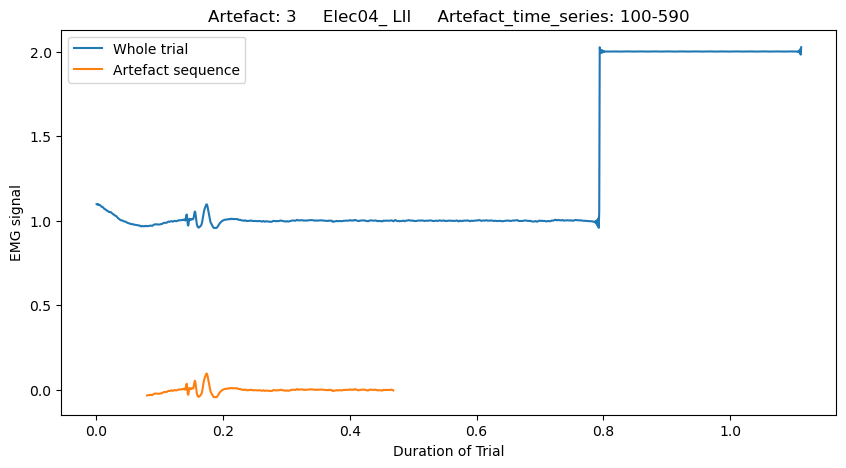

In [289]:
# #plot third artifact

i_elec_artifact=3
i_muscle_i_elec_artifact=7
i_trial_i_muscle_i_elec_artifact=27
init_t_artifact=100
end_t_artifact=590
artifact_number=3


fs = 1259.3
dt = 1/fs

# We get the last point in time
last_t_point = int(pData["_3_7"].Time_points.max())
# We take some before to define our end of array
n_points_before_last_t_pont = 4
init_t_plot = 0
end_t_plot = last_t_point-n_points_before_last_t_pont
time_points_trial_i= len(pData["_3_7"].Raw[27])   #int(trial_i_elec_i_muscle_i['Time_points']) #number of time points
time_array = dt*np.arange(1,time_points_trial_i+1) #dt = 1/fs sampling interval( abhängig vom EMG)
trial_i_muscle_i_elec_i_raw = pData["_3_7"].Raw[27]#trial_i_elec_i_muscle_i[time_series_key]
plt.figure(figsize = (10,5))
offset = 1.0
plt.xlabel("Duration of Trial")
plt.ylabel("EMG signal")
plt.title(f"Artefact: {artifact_number}     {pData['_3_7'].Elec_config} {pData['_3_7'].Muscle_or_other}     Artefact_time_series: {init_t_artifact}-{end_t_artifact}")
plt.plot(time_array[init_t_plot:end_t_plot],pData["_3_7"].Raw[27][init_t_plot:end_t_plot]+ offset, linewidth = 1.5, label= "Whole trial") 
plt.plot(time_array[init_t_artifact:end_t_artifact],pData["_3_7"].Raw[27][init_t_artifact:end_t_artifact], linewidth = 1.5, label="Artefact sequence") 
plt.legend()
artifact_time_serie_3 = pData["_3_7"].Raw[27][init_t_artifact:end_t_artifact]

In [290]:
#save artifact
print(f"artifact_number:{artifact_number}" )
subject_plots_folder_name=subject+'_plots'
save_folder = os.path.join(data_folder,subject_plots_folder_name)
save_file = subject+"artf"+str(artifact_number)+"_"+str(i_elec_artifact)+"_"+str(i_muscle_i_elec_artifact)+"_"+str(i_trial_i_muscle_i_elec_artifact)+"_"+str(init_t_artifact)+"-"+str(end_t_artifact)+".csv"
save_file_path = os.path.join(save_folder,save_file)
np.savetxt(save_file_path, artifact_time_serie_3, delimiter=',')

artifact_number:3


In [291]:
# Find the max cross_corr overall for normalization
max_corr_val = -999999999 
for elec_i in range (len(pData["_0_0"].List_elecs)) : #loop through all the elecs
    for muscle_i in range (len(pData["_0_0"].List_muscle_or_other)): # loop through all the muscles
            for trial in pData[f'_{elec_i}_{muscle_i}'].Trial_number: #loop through the trials
                corr = sp.signal.correlate(pData[f'_{elec_i}_{muscle_i}'].Raw[trial], artifact_time_serie_3)
                corr_abs = np.abs(corr)
                if np.max(corr_abs) > max_corr_val:  
                    max_corr_val = np.max(corr_abs) 


n_t_points_after = len(artifact_time_serie_3)

Check if correlation took place, thus check TS_arts_3 before and after correlation

In [292]:
pData["_0_0"].TS_arts_3

'$'

In [293]:
for elec_i in range (len(pData["_0_0"].List_elecs)): #loop through all the elecs
    for muscle_i in range (len(pData["_0_0"].List_muscle_or_other)): # loop through all the muscles
            for trial in pData[f'_{elec_i}_{muscle_i}'].Trial_number: #loop through the trials
                trial_i_muscle_i_elec_i_raw = pData[f'_{elec_i}_{muscle_i}'].Raw[trial]                   #trial_i_elec_i_muscle_i["Raw"]
                trial_i_muscle_i_elec_i_raw_to_zero = trial_i_muscle_i_elec_i_raw.copy()
                corr = sp.signal.correlate(trial_i_muscle_i_elec_i_raw, artifact_time_serie_3)
                lags = sp.signal.correlation_lags(len(trial_i_muscle_i_elec_i_raw), len(artifact_time_serie_3))
                corr_abs = np.abs(corr)
                corr_abs /= max_corr_val
                indices_to_delete = np.where(corr_abs>th_corr)[0] - (len(artifact_time_serie_3)) #What is the goal of that??
                for i_index_to_delete in range(len(indices_to_delete)):
                    index_to_delete_i = indices_to_delete[i_index_to_delete]
                    trial_i_muscle_i_elec_i_raw_to_zero[index_to_delete_i-n_t_points_before:index_to_delete_i+n_t_points_after] = 0
        
                # Saving in the dataframe
                pData[f'_{elec_i}_{muscle_i}'].TS_arts_3  = trial_i_muscle_i_elec_i_raw_to_zero
                pData[f'_{elec_i}_{muscle_i}'].Time_points_arts_3 = len(trial_i_muscle_i_elec_i_raw_to_zero)
           

In [294]:
pData["_0_0"].TS_arts_3

array([2.45185010e-03, 1.76560161e-03, 5.74205597e-04, ...,
       9.65748195e-01, 1.05082721e+00, 9.00982465e-01])

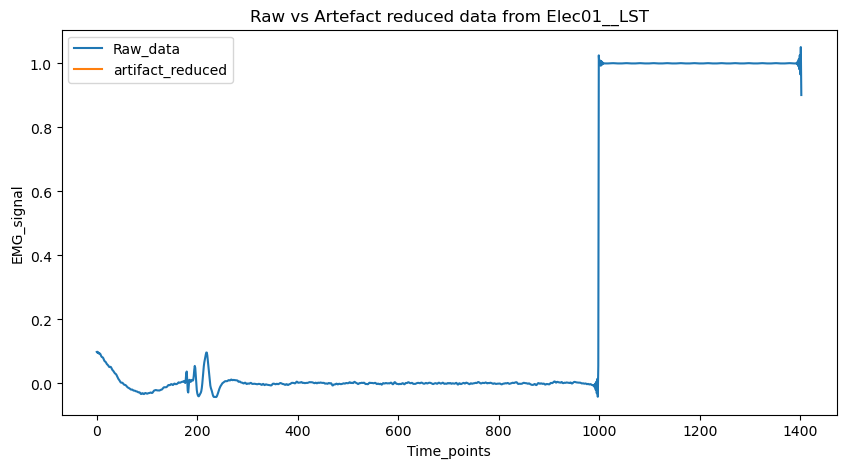

In [295]:
#plot the raw and the corrected veriosn
plt.figure(figsize = (10,5))
plt.xlabel("Time_points")
plt.ylabel("EMG_signal")
plt.title(f"Raw vs Artefact reduced data from {pData['_0_0'].Elec_config}_{pData['_0_0'].Muscle_or_other}")
plt.plot(pData["_3_7"].Raw[27], linewidth = 1.5, label="Raw_data") 
plt.plot(pData["_3_7"].TS_arts_2[27], linewidth = 1.5, label="artifact_reduced") 
plt.legend()

# Now we can plot and save the filtered data

In [296]:
time_series_key='TS_arts_2'
time_points_key='Time_points_arts_2'
init_t_plot = 0
end_t_plot = -1

In [297]:

def plot_trial_elec_i_muscle_i(df_subject_no_empty_elec_i_muscle_i,elec_i, muscle_i_elec_i, time_series_key='Raw',time_points_key='Time_points',init_t_plot = 0,end_t_plot = -1, save_flag=0,save_folder='tmp'):
    """Simplest plotting function for a time serie stored in the dataframe"""
    print(f"We are printing {time_series_key}")
    n_trials_elec_i_muscle_i = len(df_subject_no_empty_elec_i_muscle_i)
    plt.figure(figsize = (10,5))
    offset = 0
    ax = plt.axes()
    for i_trials_elec_i_muscle_i in range(n_trials_elec_i_muscle_i):
        offset += 1.0
        trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trials_elec_i_muscle_i]
        time_points_trial_i=int(trial_i_elec_i_muscle_i[time_points_key])
        time_array = dt*np.arange(1,time_points_trial_i+1)
        values=[]
        if time_series_key=='Raw':
            values = trial_i_elec_i_muscle_i[time_series_key]
        else:
            values = trial_i_elec_i_muscle_i[time_series_key]#[0]
        plt.plot(time_array[init_t_plot:end_t_plot],values[init_t_plot:end_t_plot]+ offset, linewidth = 1.5, color = (i_trials_elec_i_muscle_i/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
    plt.xlabel('Time [s]', fontsize=10),
    plt.ylabel('Trial number', fontsize=10),
    plt.title(elec_i+"-"+muscle_i_elec_i, fontsize=20)
    if save_flag:
        data_file = time_series_key+"_"+elec_i+muscle_i_elec_i+'.png'
        data_file_path = os.path.join(save_folder,data_file)
        plt.savefig(data_file_path, transparent = "True", bbox_inches='tight')

In [299]:
pData[f'_{elec_i}_{muscle_i}'].Time_points

9      1403.0
10     1403.0
11     1403.0
12     1403.0
13     1403.0
        ...  
134    1403.0
135    1403.0
136    1403.0
137    1403.0
138    1403.0
Name: Time_points, Length: 130, dtype: float64

## Plot all the elecs wo the artifacts 

Unfortunately this doesnt work yet.

Plot all the elecs for all muscles and trials wo artefact 2


for elec_i in range (len(pData["_0_0"].List_elecs)): #loop through all the elecs
    for muscle_i in range (len(pData["_0_0"].List_muscle_or_other)): # loop through all the muscles
            for trial in pData[f'_{elec_i}_{muscle_i}'].Trial_number: #loop through the trials
                trial_i_muscle_i_elec_i_raw = pData[f'_{elec_i}_{muscle_i}'].TS_arts_1[trial]
            


            #  for i_trials_elec_i_muscle_i in range(n_trials_elec_i_muscle_i):
                offset += 1.0
                # trial_i_elec_i_muscle_i = df_subject_no_empty_elec_i_muscle_i.iloc[i_trials_elec_i_muscle_i]
                
                time_points_trial_i=pData[f'_{elec_i}_{muscle_i}'].Time_points[trial]       #int(trial_i_elec_i_muscle_i[time_points_key])
                time_array = dt*np.arange(1,time_points_trial_i+1)
                
            
                values = pData[f'_{elec_i}_{muscle_i}'].TS_arts_1
                # plt.plot(time_array[init_t_plot:end_t_plot],values[init_t_plot:end_t_plot]+ offset, linewidth = 1.5, color = (i_trials_elec_i_muscle_i/n_trials_elec_i_muscle_i, 0.2, 0.3)) 
                plt.plot(time_array,values+ offset, linewidth = 1.5) 


#### Add as further step #####

# plt.xlabel('Time [s]', fontsize=10),
# plt.ylabel('Trial number', fontsize=10),
# plt.title(elec_i+"-"+muscle_i_elec_i, fontsize=20)
# if save_flag:
#     data_file = time_series_key+"_"+elec_i+muscle_i_elec_i+'.png'
#     data_file_path = os.path.join(save_folder,data_file)
#     plt.savefig(data_file_path, transparent = "True", bbox_inches='tight')

In [300]:
### save files as pickle file  to projectome_finder#
#to run set run=1
run=0
if run == 1:
    import pickle
    fh = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/Class2_artifactfree_dump.pkl', "wb")
    pickle.dump(pData, fh)
    fh.close()